In [ ]:
!pip install fhnw-nlp-utils

from fhnw.nlp.utils.storage import load_dataframe

import pandas as pd
import numpy as np

file = "data/german_news_articles_original_train_and_test_tokenized.parq"
data_all = load_dataframe(file)

# Summary

I choose the *Thousand German News Articles Dataset* for my project assignment. 
There was not much cleaning needed as this was already done by the creator of the dataset and the steps shown in the 'class notebook' were sufficient.

The dataset poses a multiclass (9) classification problem.  

<AxesSubplot:>

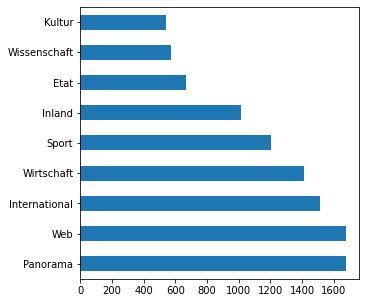

In [2]:
data_all['label'].value_counts().plot.barh(figsize=(5,5))

- Kultur, Wissenschaft and Etat together are smaller than the largest class. This imbalance needs to be adressed but I did not follow that path.
- The dataset is not very large which might be the reason why deep learning model like CNN and RNN do not show good results

## TF-IDF based models

### Roadmap
- After cleaning I created a baseline model with TF-IDF. See [02_PA_Baseline%20Prediction](02_PA_Baseline%20Prediction.ipynb)
- After that I created some alternative models using other classification algorithms (all based on TF-IDF)
- Evaluated the difference between models using Lemmatization vs Stemming (Stemming is slighlty better)
- And eventually did some hyperparameter tuning.

### Evaluation

The **winner is SGDClassifier on Stemmed tokens after optimization with BayesSearchCV**. But the different to the baseline above is just marginal

- As as Classifier SGDClassifier seems to be the winner. It is surprising how good the above baseline without any tweaking or optimization is performing. 
- Stemming seems to deliver slightly improved results than Lemmatization
- 2 Gram always seems to be worse than 1 Gram


The calculation of the other models can be found in 
[PA_Classification_Expermiments](03_PA_Classification_Expermiments.ipynb)

Here the description of the different columns
- f1- baseline: SGD Classifier 1 Gram on token_lemma (see this notebook)
- f1-one vs one: OneVsOneClassifier  Gram on token_lemma
- f1-baseline 2 Gram: SGD Classifier 1 and 2 Gram on token_lemma
- f1-kNN: K-Nearest Neighbours Classifier 1 Gram on token_lemma
- f1-Random Forest: Random Forest Classifier  1 Gram on token_lemma
- f1-Naiv Bayes: Naive Bayes Classifier  1 Gram on token_lemma
- f1-baseline stemming: SGD Classifier 1 Gram on on token_stem (Stemming tokens)
- **f1-baseline stemming optimized**: SGD Classifier 1 Gram on on token_stem (Stemming tokens) using BayesSearchCV
- f1-dummy-clf: Dummy classifier stratified

The following table shows the F1 Score of the different models.


![classification_results.png.png](classification_results.png)

## Vertex AI (Auto ML)
I also used the data to train on **Google Vertex AI (Auto ML)**. 

See steps in [PA_AutoML Data Prep](04_PA_AutoML%20Data%20Prep.ipynb)

Had some difficulties to compare the result with the result above. 
But it seems that Auto ML is doing worse than the baseline. I assume that the average 

Weighted F1-Score at confidence 50% is **0.8754308**
Which is actually is very convenient as no tokenization or other tuning steps were needed. Auto ML could be used a very quick baseline model.

## Deep Learning Models
I followed the notebooks presented during the course and created the CNN and RNN LSTM models. 
See 
- [05_PA_CNN%20German%20Newsset](05_PA_CNN%20German%20Newsset.ipynb)
- [06_PA_RNN%20German%20Newsset](06_PA_RNN%20German%20Newsset.ipynb)



- the result were by far not as good as the 'simple' models (max 0.74 weighted f1-score)
- but the effort was much bigger and cumbersome
- many OOM Error forced the tuning of the batch size
- training and evaluation took a lot longer but the result did not justify the addidional effort.

## Transformer Models
The last 2 notebook are using Transformer based models. I wanted to compare the results and the handling of
simpletransfomers.ai model vs. keras/tensorflow implementation.
Both models use *bert, bert-base-german-cased*

### Simpletransformers.ai
It was very easy to follow the instructions on their website and the model was up and running in a very short time. Some minimal tuning of the batch was size needed. The result was very appealing but not significant better than the 'simple' models.
See [07_PA_Simple%20Transformer](07_PA_Simple%20Transformer.ipynb)

### Keras/Tensorflow 
The implementation using tensorflow was much more complicated and would not have been possible without the guidances of the class notebook provided. Nevertheless good results werde achieved but still not significant better than the 'simple' models.
See [08_PA_Classification%20BERT](08_PA_Classification%20BERT.ipynb)

The following shows the classification results achieved

![classification_results_transformers](classification_results_transformers.png)



## Fazit

With this dataset the 'simple' models outperform the more complicated ones. Simple Models are easier to explain and reason about. 
Results could be improved by
- Finding better stopwords  
- Deal with the class imbalances
- Better architecure on deep learning models

All in all it was very interesting to 'play' around with different classifiers, models... 